In [1]:
from IPython.display import HTML


In [168]:
if False: # just use this if you want to hide the code
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    The raw code for this IPython notebook is by default hidden for easier reading.
    To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import pandas as pd
import numpy as np

## Data Set Information:

Taken from [source](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression).

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse. 

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not. 

Classes: 
c-CS-s: control mice, stimulated to learn, injected with saline (9 mice) 
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice) 
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice) 
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice) 

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice) 
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice) 
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice) 
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice) 

The aim is to identify subsets of proteins that are discriminant between the classes. 

Read in the data from the excel format.

In [4]:
data_path = "I:/Course Materials/Practical Data Science/Project/mice/Data_Cortex_Nuclear.xls"
data_path = "../../data/external/data_geneMice/Data_Cortex_Nuclear.xls"
data_path = "../Data_Cortex_Nuclear.xls"

raw_df = pd.read_excel(data_path)

The MouseID isn't really in tidy data format, it effectively has two variables in it, the mouse number (to the left of the '_' character), and the mouse version (to the right). Make some new columns and remove the now redundant MouseID column.

In [6]:
raw_df['MouseNumber'] = raw_df.MouseID.apply(lambda x: x.split('_')[0])
raw_df['MouseVersion'] = raw_df.MouseID.apply(lambda x: x.split('_')[1])
raw_df.drop(['MouseID'], axis=1, inplace=True)

In [7]:
mean_mouse_values = raw_df.groupby(by=['class']).mean().reset_index()

There are many null values in the dataframe. To deal with these, the mice will receive the mean value of their other versions rather than eliminating the entire mouse from the data, or by using the mean of all of the mice which have very different genetic and environmental factors in their development. 

In [8]:
class_value = 'class'

def fix_null_values(row, col):
    value = row[col]
    if pd.isnull(value):
        return mean_mouse_values.loc[mean_mouse_values[class_value] == row[class_value], col], True
    return value, False

In [9]:
for i, row in raw_df.iterrows():
    for col in raw_df.columns:
        row[col], fixed = fix_null_values(row, col)
    raw_df.iloc[i] = row

## Data exploration

### Columnwise exploration

I want to do a series of violin plots of the expression value for each protein type. To make the plots have proteins with similar magnitudes so that their sized appropriately, firstly get the mean values and sort the DF by that.

In [10]:
class_labels = ['Genotype','Treatment','Behavior','class', 'MouseNumber', 'MouseVersion']
melt_df = pd.melt(raw_df, id_vars = class_labels)

In [11]:
expression_level_means = melt_df.groupby(by=['variable']).max().reset_index()

,variable,Genotype,Treatment,Behavior,class,MouseNumber,MouseVersion,value
0,ADARB1_N,Ts65Dn,Saline,S/C,t-SC-s,J3295,9,2.539890
1,AKT_N,Ts65Dn,Saline,S/C,t-SC-s,J3295,9,1.182175
2,AMPKA_N,Ts65Dn,Saline,S/C,t-SC-s,J3295,9,0.700839
3,APP_N,Ts65Dn,Saline,S/C,t-SC-s,J3295,9,0.632663
4,ARC_N,Ts65Dn,Saline,S/C,t-SC-s,J3295,9,0.158748


In [12]:
variable_list = expression_level_means.sort_values(by='value').variable

In [13]:
variable_subsets = np.array(variable_list).reshape(11,7)

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

class PlotManager(object):
    def __init__(self):
        self.i = 1
    def save_last_plt(self):
        plt.savefig('Figure_{}.png'.format(self.i))
        self.i += 1

plt_manager = PlotManager()

In [180]:


def plot_expression_values():
    for (i, variable_subset) in enumerate(variable_subsets):
        data = melt_df.loc[melt_df.variable.isin(variable_subset)]

        sns.violinplot(x="variable", y="value", hue="variable", width=1, data=data, scale="area", orient="v")     

        sns.despine(left=True)
        plt_manager.save_last_plt()
        yield plt.show()



In [181]:
expression_plots = plot_expression_values()

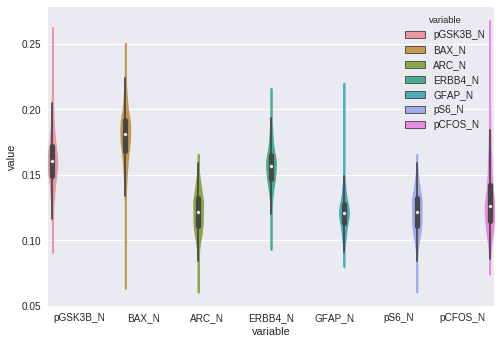

In [182]:
next(expression_plots)

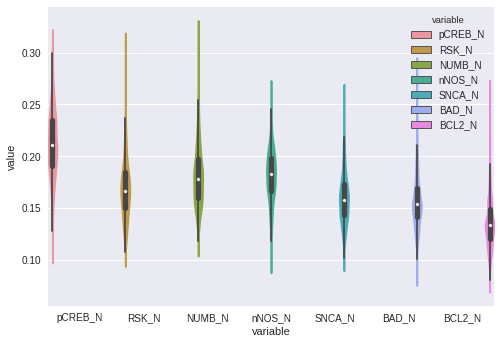

In [183]:
next(expression_plots)

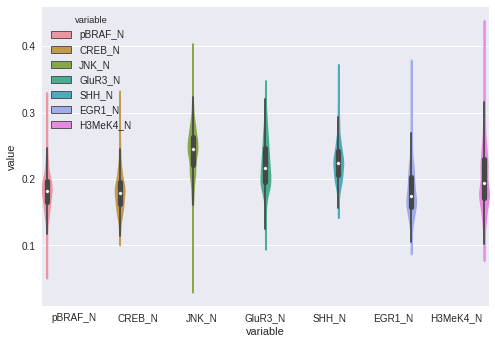

In [184]:
next(expression_plots)

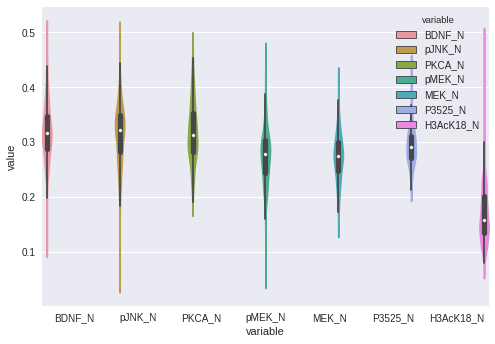

In [185]:
next(expression_plots)

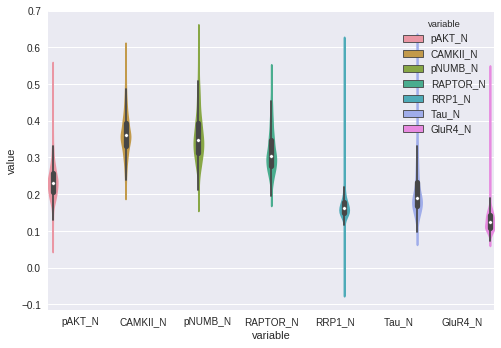

In [186]:
next(expression_plots)

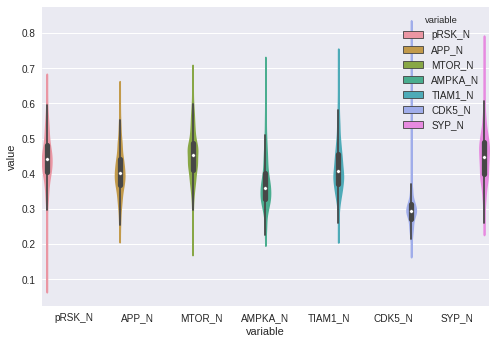

In [187]:
next(expression_plots)

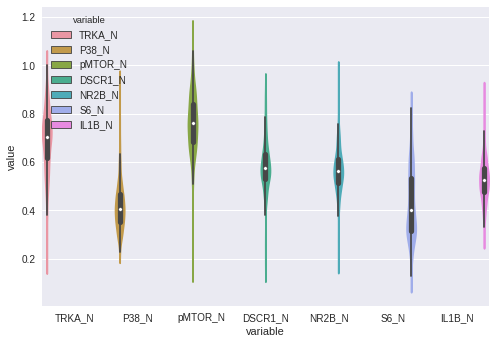

In [188]:
next(expression_plots)

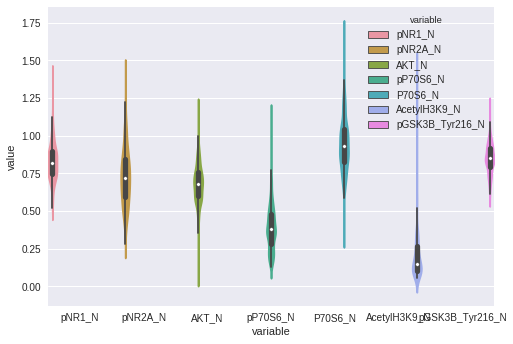

In [189]:
next(expression_plots)

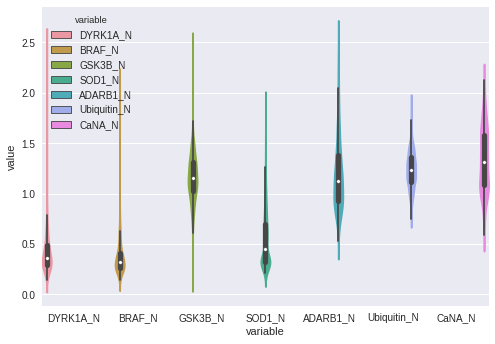

In [190]:
next(expression_plots)

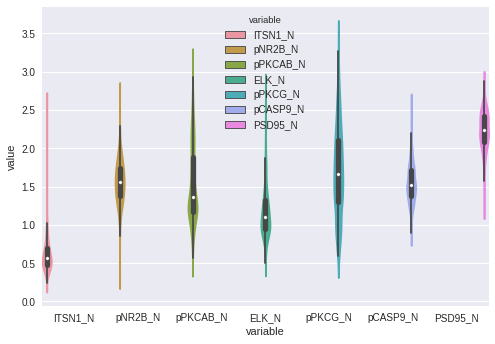

In [191]:
next(expression_plots)

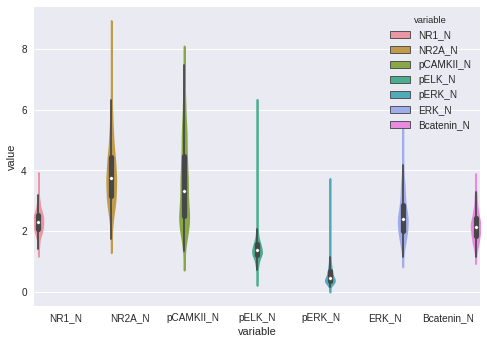

In [192]:
next(expression_plots)

### Pairwise exploration 
(Nisa to do). DONE :D 

In [193]:
import matplotlib.pyplot as plt

My first protein choice to be examined is DYRK1A_N
It is because it has big range of outliers. 

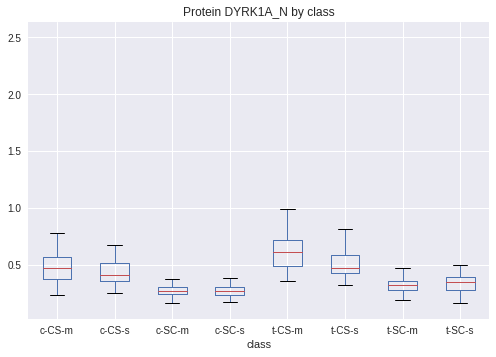

In [194]:


raw_df.boxplot(column='DYRK1A_N', by ='class')
plt.title('Protein DYRK1A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt.show()
plt_manager.save_last_plt()



as we can see, the most obvious outlier is from c-CS-s class.

In [30]:
raw2=raw_df.loc[raw_df['class'] == 'c-CS-s']

Now I am exploring more about the outliers in c-CS-s class


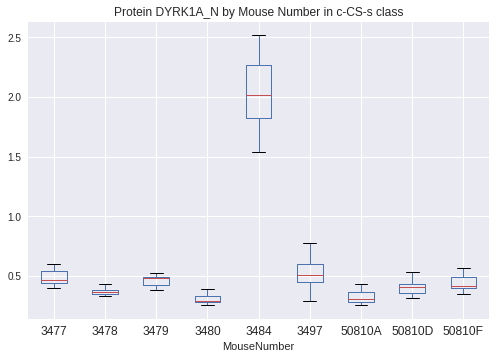

In [195]:

raw2.boxplot(column='DYRK1A_N', by ='MouseNumber')
plt.title('Protein DYRK1A_N by Mouse Number in c-CS-s class')
plt.rcParams.update({'font.size': 10})
plt.suptitle("")
plt.show()
plt_manager.save_last_plt()




Here, it can see clearly that Mouse Number 3484 are different than others.

Now we inspecting Mouse Version in class c-CS-s where Mouse Number = 3484


In [32]:
raw2a=raw2.loc[raw2['MouseNumber'] == '3484']

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,MouseNumber,MouseVersion
360,2.480316,2.488684,0.437048,3.126094,6.003804,0.209776,0.185337,3.153290,0.236021,4.497337,...,0.145542,0.136711,0.172007,2.009125,Control,Saline,C/S,c-CS-s,3484,1
361,2.023024,2.519464,0.426260,3.029589,5.832085,0.202774,0.179935,3.022099,0.234304,4.299122,...,0.145542,0.127714,0.172007,2.038111,Control,Saline,C/S,c-CS-s,3484,2


More exploration in outlier mice in c-CS-s class
I want to just plotting x by y but it's better to see this result with this box plot 

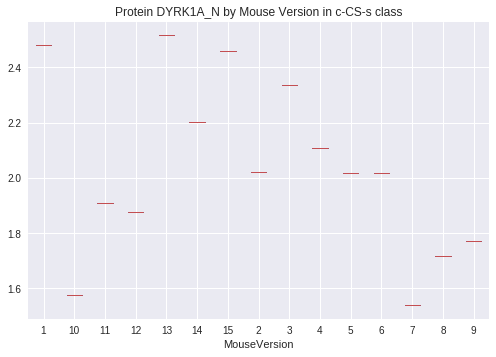

In [196]:
raw2a.boxplot(column='DYRK1A_N', by ='MouseVersion')
plt.title('Protein DYRK1A_N by Mouse Version in c-CS-s class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()



Here shows 9 mouse versions that have outliers with value > 2 

My second protein choice to be examined is AcetylH3K9_N
It is because it also has big range of outliers. 

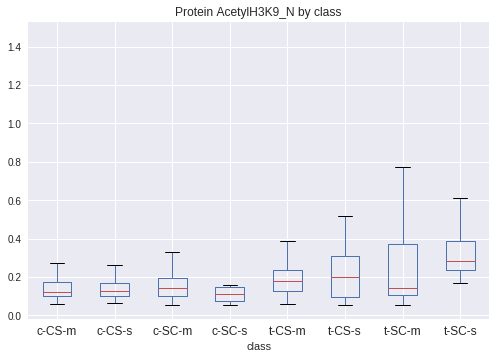

In [34]:
raw_df.boxplot(column='AcetylH3K9_N', by ='class')
plt.title('Protein AcetylH3K9_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()



And as we can see, the most obvious outlier is from c-SC-s.

In [35]:
raw3=raw_df.loc[raw_df['class'] == 'c-SC-s']

Now we explore class c-SC-s more


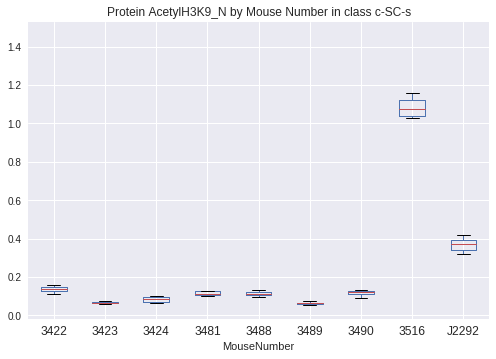

In [36]:

raw3.boxplot(column='AcetylH3K9_N', by ='MouseNumber')
plt.title('Protein AcetylH3K9_N by Mouse Number in class c-SC-s')
plt.rcParams.update({'font.size': 8})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()



From the graph, we can see that protein 3516 has different value than others
Also it has the furthest outliers

Now we inspecting Mouse Number 3516


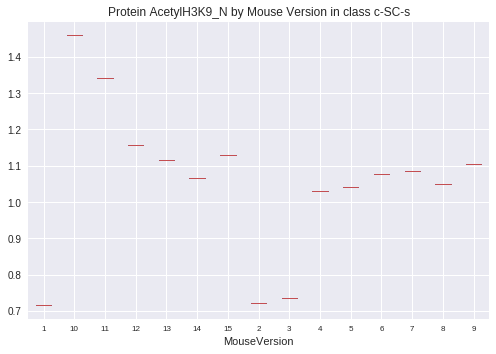

In [37]:

raw3a=raw3.loc[raw3['MouseNumber'] == '3516']
#raw3a.plot(x='MouseVersion', y='AcetylH3K9_N')

raw3a.boxplot(column='AcetylH3K9_N', by ='MouseVersion')
plt.title('Protein AcetylH3K9_N by Mouse Version in class c-SC-s')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()



It looks like all of the mouse version in this protein have big range of outliers 
Mouse version 10 & 11 in this protein are the most distant.

My third protein choice to be examined is RRP1_N because it has negative values. 


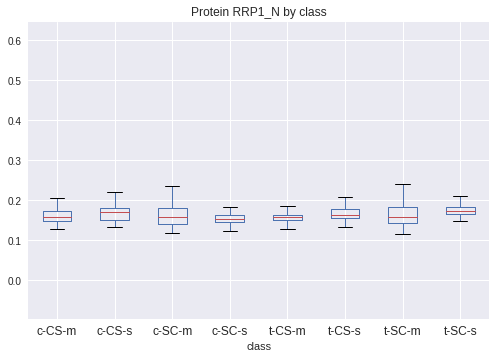

In [38]:

raw_df.boxplot(column='RRP1_N', by ='class')
plt.title('Protein RRP1_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()



Here, the negative value comes from c-SC-m class
Now exploring more c-SC-m class

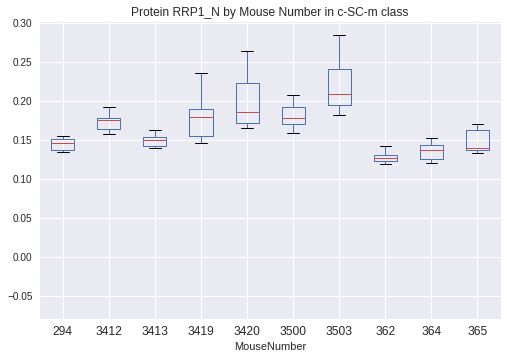

In [39]:
#
raw1=raw_df.loc[raw_df['class'] == 'c-SC-m']
raw1.boxplot(column='RRP1_N', by ='MouseNumber')
plt.title('Protein RRP1_N by Mouse Number in c-SC-m class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()



The negative value in c-SC-m class comes from Mouse Number 365.

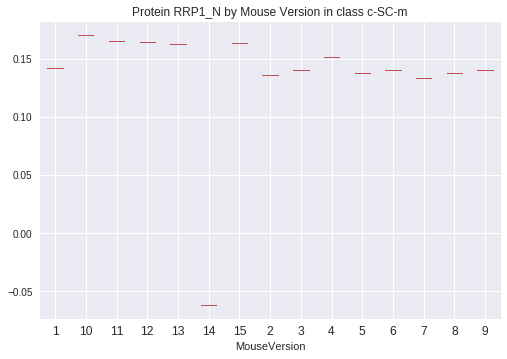

In [40]:
#Now exploring Mouse Number 365 in c-SC-m class

raw1a=raw1.loc[raw1['MouseNumber'] == '365']
raw1a.boxplot(column='RRP1_N', by ='MouseVersion')
plt.title('Protein RRP1_N by Mouse Version in class c-SC-m')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

#This the end of result:
#One mouse has negative values in class c-SC-m, with ID: Mouse Number 365 and Mouse Version 14.  

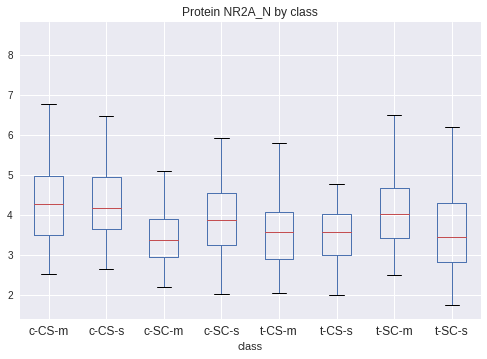

In [41]:
#The 4th protein that I explore is NR2A_N because its' range value is the biggest and totally different with other proteins

raw_df.boxplot(column='NR2A_N', by ='class')
plt.title('Protein NR2A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

#While most of proteins range from 0 to 2, this protein range around 2 to 8 with mean around 3-4.
#The outliers is come from c-CS-s class

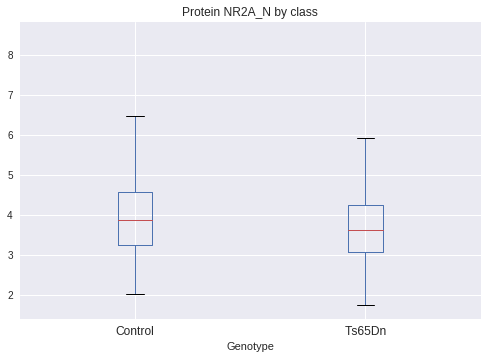

In [42]:
#Now we explore more about this protein
raw_df.boxplot(column='NR2A_N', by ='Genotype')
plt.title('Protein NR2A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

#The mean value for both of class is almost similar, 
#but the control mice has more outliers (greater than 8)

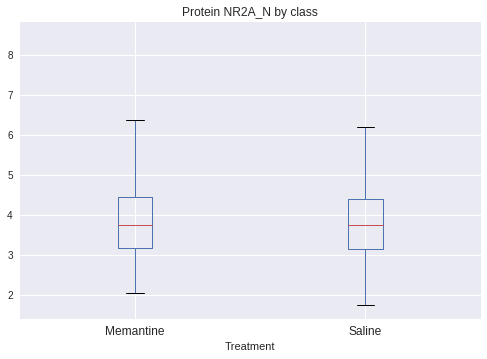

Here, saline produce outliers with value more than 8.


In [43]:
raw_df.boxplot(column='NR2A_N', by ='Treatment')
plt.title('Protein NR2A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

print("Here, saline produce outliers with value more than 8.")

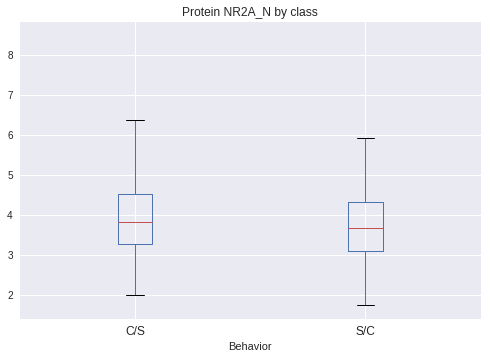

In [44]:
raw_df.boxplot(column='NR2A_N', by ='Behavior')
plt.title('Protein NR2A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

#Here C/S produce the most outliers.
#Therefore, I can conclude the huge range of protein (that makes this protein values differ from other) is come from outliers.
#The outliers come from control mice with C/S behaviour and saline treatment.

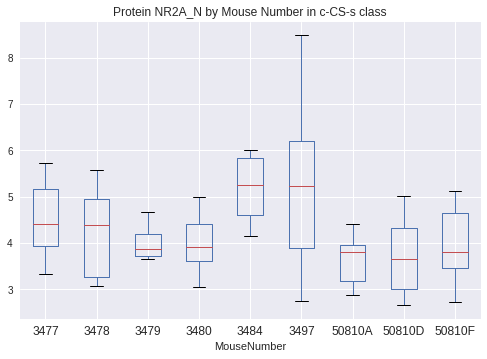

In [45]:
#Now we explore more about this c-CS-s class

raw4=raw_df.loc[raw_df['class'] == 'c-CS-s']
raw4.boxplot(column='NR2A_N', by ='MouseNumber')
plt.title('Protein NR2A_N by Mouse Number in c-CS-s class')
plt.rcParams.update({'font.size': 10})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

#It seems that the Mouse Number 3497 is the one who produce the most outliers

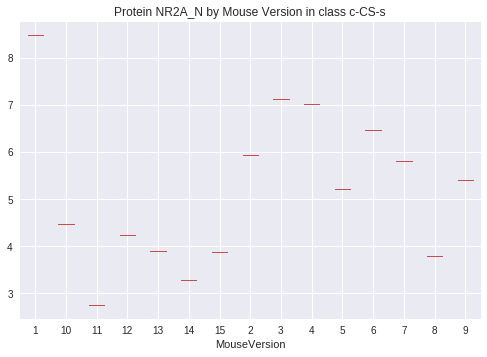

In [46]:
#Now we explore mouse 3497 from c-CS-s class

raw4a=raw4.loc[raw4['MouseNumber'] == '3497']
raw4a.boxplot(column='NR2A_N', by ='MouseVersion')
plt.title('Protein NR2A_N by Mouse Version in class c-CS-s')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()


#The outliers come from protein 1.
#Therefore, from protein NR2A_N, it has big range because of the outliers from c-CS-s class,
#comes from mouse version 1 with mouse ID 3491

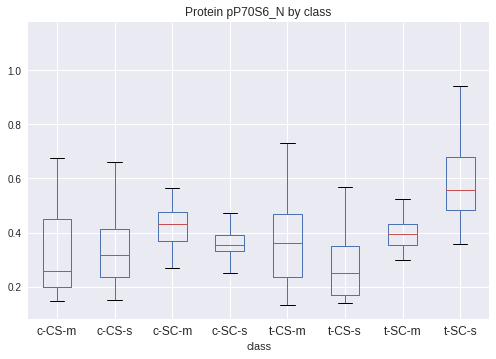

In [47]:
#The last protein that I explore is pP7056_N because it has big range of value also.

raw_df.boxplot(column='pP70S6_N', by ='class')
plt.title('Protein pP70S6_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

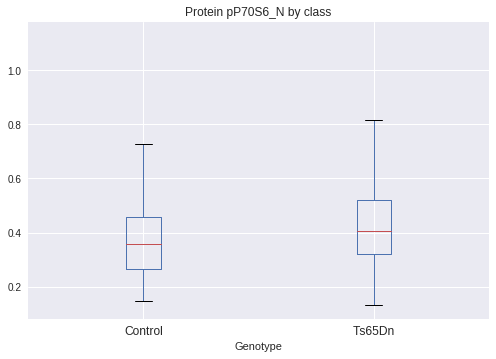

In [48]:
#Now we explore more about this protein
raw_df.boxplot(column='pP70S6_N', by ='Genotype')
plt.title('Protein pP70S6_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

#The mean value for both of class is almost similar, 
#but the trisomic has more outliers 

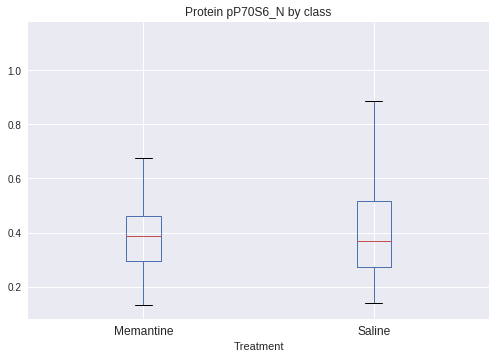

In [49]:
raw_df.boxplot(column='pP70S6_N', by ='Treatment')
plt.title('Protein pP70S6_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

#Here although the mean of both treatment are pretty close,
#but memantine has more range of outliers

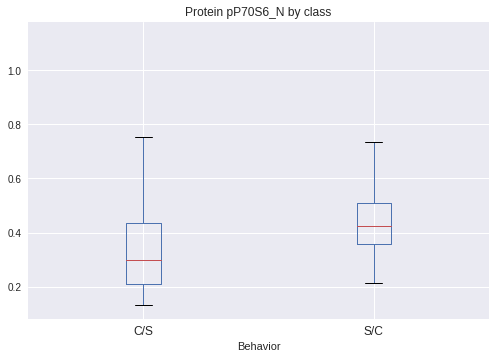

In [50]:
raw_df.boxplot(column='pP70S6_N', by ='Behavior')
plt.title('Protein pP70S6_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

#The mean is quite different.
#S/C has higher value of mean with shorter range of outliers, while C/S is the opposite.

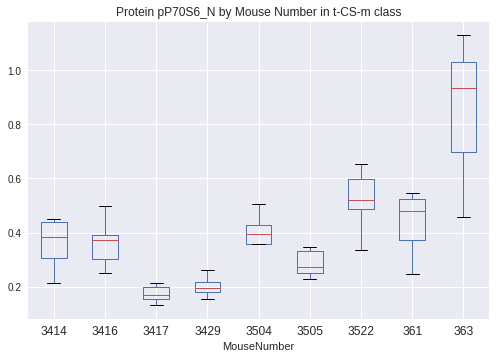

In [51]:
#Now we explore more about mice from class t-CS-m in this protein

raw5=raw_df.loc[raw_df['class'] == 't-CS-m']
raw5.boxplot(column='pP70S6_N', by ='MouseNumber')
plt.title('Protein pP70S6_N by Mouse Number in t-CS-m class')
plt.rcParams.update({'font.size': 10})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

#The highers IQR is coming from Mouse Number 363. 

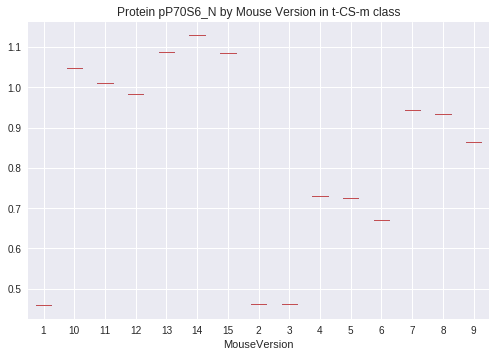

In [52]:
#Now we explore more about mouse 363 from class t-CS-m in this protein

raw5a=raw5.loc[raw_df['MouseNumber'] == '363']
raw5a.boxplot(column='pP70S6_N', by ='MouseVersion')
plt.title('Protein pP70S6_N by Mouse Version in t-CS-m class')
plt.rcParams.update({'font.size': 10})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

#Here mice number 13,14,and 15 have the highest value.
#Therefore, from protein pP70S6_N, it has big range because of the outliers from t-CS-m class,
#comes from mouse version 13,14,and 15 with mouse ID 363

### Outlier detection

Paper took one mouse out, make sure this is out of our data, and look at other outliers?

## Data modelling

### Separate data

In [54]:
to_ignore = ['MouseNumber','MouseVersion']
class_labels = ['Genotype','Treatment','Behavior','class']
# the data frame which consists solely of the target variables
df_class = raw_df[class_labels] 
# the data frame which consists soley of the protein expression levels
df_attributes = raw_df.drop(class_labels+to_ignore, axis=1) 



### Preprocessing

[source](http://scikit-learn.org/stable/modules/preprocessing.html)

4.3.1. Standardization, or mean removal and variance scaling

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.
In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.
For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
The function scale provides a quick and easy way to perform this operation on a single array-like dataset:

In [57]:
from sklearn import preprocessing

In [58]:
scaler = preprocessing.StandardScaler()
df_attributes[:] = scaler.fit_transform(df_attributes[:])

In [60]:
normalizer = preprocessing.Normalizer()
df_attributes[:] = normalizer.fit_transform(df_attributes[:])
df_attributes.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.035114,0.058064,0.252263,0.167677,0.258047,-0.038723,-0.017796,-0.100868,0.067476,0.077539,...,-0.146147,-0.145664,-0.016048,-0.119375,-0.108643,-0.031991,-0.112338,-0.154812,-0.171578,0.119333
1,0.045266,0.036345,0.237876,0.179731,0.250212,-0.065668,-0.042374,-0.121992,0.055840,0.045687,...,-0.114736,-0.192896,-0.018138,-0.132381,-0.144851,-0.008560,-0.133290,-0.163780,-0.186511,0.162007
2,0.041101,0.055207,0.246260,0.137687,0.233685,-0.071231,-0.027806,-0.118801,0.066314,0.034977,...,-0.139326,-0.178174,-0.017540,-0.113343,-0.129973,-0.018974,-0.129090,-0.164068,-0.189376,0.227236
3,0.010178,0.000100,0.122808,0.075035,0.186865,-0.038033,-0.030607,-0.164238,-0.026413,0.054881,...,-0.182724,-0.141260,-0.021956,-0.196836,-0.129214,-0.125451,-0.111177,-0.147762,-0.177462,0.175310
4,0.005981,0.000327,0.127883,0.031448,0.149259,-0.076795,-0.048413,-0.172512,-0.099844,0.025946,...,-0.115486,-0.163238,-0.022762,-0.186256,-0.137868,-0.028505,-0.148907,-0.183430,-0.179282,0.251465


In [61]:
min_max_scaler = preprocessing.MinMaxScaler()
df_attributes[:] = min_max_scaler.fit_transform(df_attributes[:])
df_attributes.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.331119,0.410456,0.866158,0.816022,0.927025,0.406268,0.434526,0.192267,0.588272,0.277741,...,0.216766,0.174172,0.349372,0.316130,0.241170,0.433765,0.108459,0.135337,0.072206,0.644377
1,0.349237,0.374197,0.847779,0.840689,0.912130,0.382484,0.398985,0.155872,0.569748,0.247271,...,0.251151,0.107993,0.346795,0.296079,0.192454,0.466078,0.080701,0.122999,0.045539,0.709543
2,0.341805,0.405687,0.858489,0.754651,0.880711,0.377574,0.420050,0.161369,0.586423,0.237026,...,0.224233,0.128620,0.347532,0.325431,0.212472,0.451716,0.086265,0.122603,0.040423,0.809155
3,0.286615,0.313685,0.700780,0.626441,0.791705,0.406877,0.416001,0.083080,0.438796,0.256066,...,0.176726,0.180343,0.342088,0.196704,0.213493,0.304873,0.109998,0.145035,0.061699,0.729860
4,0.279123,0.314065,0.707263,0.537245,0.720214,0.372662,0.390254,0.068824,0.321889,0.228387,...,0.250330,0.149548,0.341094,0.213017,0.201849,0.438571,0.060010,0.095965,0.058448,0.846156


## Classification

First, randomly choose 2/3 of the data as training data, with the remaining 1/3 to be used as test data.

In [62]:
def make_random_indices(seed=None, training_fraction=0.67):
    if seed:
        np.random.seed(seed=seed)
    n = len(df_attributes)
    n_train = int(n*2.0/3)

    i_shuffle = np.random.permutation(n)        # if n = 7, i_shuffle = [6 4 2 0 3 1 5]
    i_train = i_shuffle[:n_train]               # then i_train = [6 4 2 0]
    i_test = i_shuffle[n_train:]                # and i_test = [3,1,5]
    assert set(i_train) & set(i_test) == set([])
    return i_train, i_test


These indices can be used to pull out the rows from each dataframe

The goal of the classifiers is to take the `x_train` data, and create a model for classification based on the `y_train` data. We'll then judge the effectiveness of the classfication based on how well it can predict `y_test` using the `x_test` as input using the following performance metrics/methods:
- Confusion Matrix: see `plot_confusion_matrix`
- Classification error rate: the percentage of observations in the test data that the model mislabelled
- Precision: `tp/(tp+fp)` where `tp` is the number of true positives and `fp` is the number of false positves i.e the ability of the classifier not to label as positive a sample that is negative.
- Recall: The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
- F1-score: the F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
F1 = 2 * (precision * recall) / (precision + recall)


In [142]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

def performance_report(y_test, y_pred, classes):
    plot_confusion_matrix(y_test, y_pred, classes)
    classification_error_rate = 1.0*sum(1 for (x,y) in zip(y_test, y_pred) if x!=y)/len(list(y_test))
    print classification_error_rate
    return classification_report(y_test, y_pred)
    

def plot_confusion_matrix(y_test, y_pred, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)


    # Plot normalized confusion matrix
    plt.figure()
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{0:.3f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def feature_importance_report(clf, features):
    feature_importances = zip(features, clf.feature_importances_)
    rows = []
    for f, imp in sorted(feature_importances, key = lambda x: x[1], reverse=True):
        rows.append([f, imp])
    report_df = pd.DataFrame(rows, columns=['Feature', 'Relative_Importance'])
    return report_df

The function below is used in to run three classifiers below. The classifiers all have the standard sklearn API for classifiers, and the function allows us to easily repeat an analysis with various classifiers.

In [143]:

def run_classifier(clf, class_label, seed=None):
    i_train, i_test = make_random_indices(seed=None)
    x_train = df_attributes.iloc[i_train]
    y_train = df_class.iloc[i_train][class_label]

    x_test = df_attributes.iloc[i_test]
    y_test = df_class.iloc[i_test][class_label]
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    class_names = set(df_class[class_label].values)    

    print(performance_report(y_test, y_pred, class_names))
    print(clf.score(x_test, y_test))
    plt_manager.save_last_plt()

    plt.show()




The function below is used to plot the Confusion Matrix for a classifier.

### Decision Tree Classifier

0.186111111111
             precision    recall  f1-score   support

     c-CS-m       0.72      0.69      0.70        62
     c-CS-s       0.90      0.77      0.83        47
     c-SC-m       0.89      0.85      0.87        46
     c-SC-s       0.83      0.91      0.87        32
     t-CS-m       0.78      0.80      0.79        44
     t-CS-s       0.66      0.74      0.70        39
     t-SC-m       0.85      0.89      0.87        44
     t-SC-s       0.93      0.93      0.93        46

avg / total       0.82      0.81      0.81       360

0.813888888889


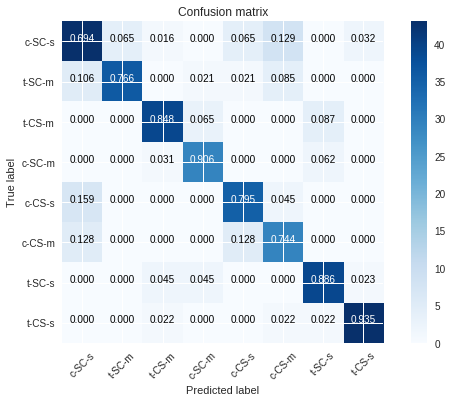

In [144]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
run_classifier(clf, 'class', seed=1)

In [145]:
dt_importance = feature_importance_report(clf, df_attributes.columns)

### Random Forest Classifier

0.00833333333333
             precision    recall  f1-score   support

     c-CS-m       1.00      1.00      1.00        38
     c-CS-s       1.00      1.00      1.00        44
     c-SC-m       0.98      0.96      0.97        57
     c-SC-s       1.00      1.00      1.00        51
     t-CS-m       1.00      1.00      1.00        44
     t-CS-s       1.00      1.00      1.00        36
     t-SC-m       0.96      0.98      0.97        46
     t-SC-s       1.00      1.00      1.00        44

avg / total       0.99      0.99      0.99       360

0.991666666667


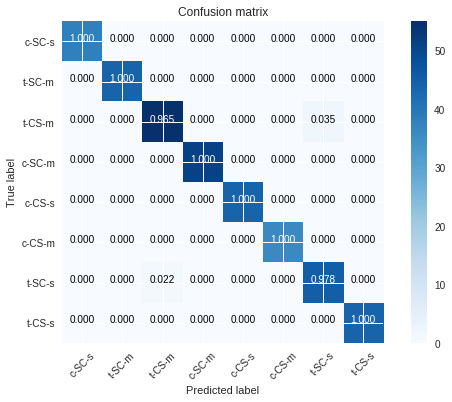

In [146]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000)
run_classifier(clf, 'class', seed=1)


In [147]:
rf_importance = feature_importance_report(clf, df_attributes.columns)

It's interesing to then consider the other classes: Genotype, Treatment and Behavior.

0.00555555555556
             precision    recall  f1-score   support

    Control       0.99      0.99      0.99       187
     Ts65Dn       0.99      0.99      0.99       173

avg / total       0.99      0.99      0.99       360

0.994444444444


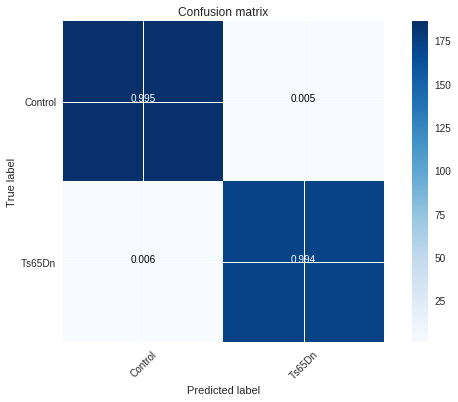

In [148]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
run_classifier(clf, 'Genotype', seed=1)

In [149]:
gen_importance = feature_importance_report(clf, df_attributes.columns)

0.0
             precision    recall  f1-score   support

        C/S       1.00      1.00      1.00       173
        S/C       1.00      1.00      1.00       187

avg / total       1.00      1.00      1.00       360

1.0


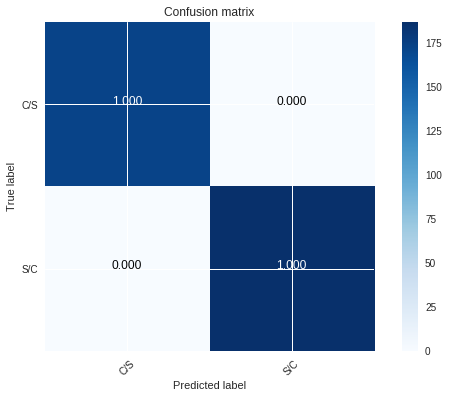

In [206]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
run_classifier(clf, 'Behavior', seed=1)

In [151]:
beh_importance = feature_importance_report(clf, df_attributes.columns)

0.0194444444444
             precision    recall  f1-score   support

  Memantine       0.98      0.98      0.98       185
     Saline       0.98      0.98      0.98       175

avg / total       0.98      0.98      0.98       360

0.980555555556


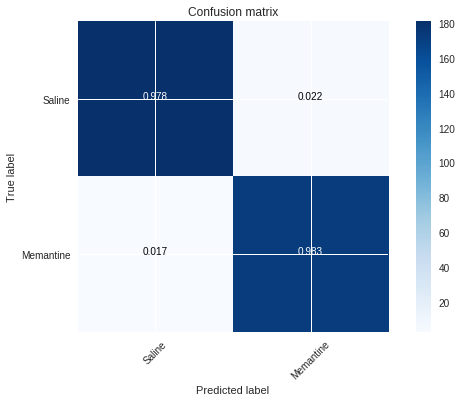

In [152]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
run_classifier(clf, 'Treatment', seed=1)

In [153]:
tre_importance = feature_importance_report(clf, df_attributes.columns)

These results indicate that perhaps we should consider the following approach:
    - Make a model that predicts each of the binary variables from the protein expression data
    - Make a model that predicts the class of the mouse *not* only by the protein expression data, but also from the predicted binary class.

In [154]:
import copy

class CompoundBinaryClassifier(object):
    """
    In cases where the target variable is actually a compound of multiple
    binary variables, it makes sense to instead predict individual binary variables
    separately, without the other binary variables confounding the classifiers.
    """
    def __init__(self, binary_classes, compound_class, base_clf):
        """
        @param binary_variables    a list of the columns in the target data that make up the binary
                                   variables of interest.
        @base_clf                  the classifier (or list of classifiers) that is used to make the predictions
        """
        
        self.clf = dict([(bin_var, copy.copy(base_clf)) for bin_var in binary_classes])
        self.clf[compound_class] = copy.copy(base_clf)
        self.binary_classes = binary_classes
        self.compound_class = compound_class
        self.make_binary_map()
        
    def make_binary_map(self):
        self.mapper = {}
        self.mapper['Genotype'] = lambda x: 1 if x == 'Control' else 0
        self.mapper['Treatment'] = lambda x: 1 if x == 'Memantine' else 0
        self.mapper['Behavior'] = lambda x: 1 if x == 'C/S' else 0
        
    def fit(self, x_train, y_train):
        self._x_train = x_train
        self._y_train = y_train
        self._fit_binary()
        self._fit_compound_class()
        
    def _fit_binary(self):
        for variable in self.binary_classes:
            clf = self.clf[variable]
            clf.fit(self._x_train, self._y_train[variable])
    def _fit_compound_class(self):
        # need to encode the binary variables numerically: as 1's and 0's
        self.augmented_feature_data = self._augment_features(self._x_train)
        self.clf[self.compound_class].fit(self.augmented_feature_data, self._y_train[self.compound_class])
        
    def _augment_features(self, feature_data):
        augmented_feature_data = copy.deepcopy(feature_data)
        for bin_class in self.binary_classes:
            predicted_targets = self.clf[bin_class].predict(feature_data)
            augmented_feature_data[bin_class] = list(map(self.mapper[bin_class], predicted_targets))
        return augmented_feature_data
    
    def predict(self, x_test):
        augmented_x_test = self._augment_features(x_test)
        return self.clf[self.compound_class].predict(augmented_x_test)
    def score(self, x_test, y_test):
        augmented_x_test = self._augment_features(x_test)
        return self.clf[self.compound_class].score(augmented_x_test, y_test[self.compound_class])
            

In [155]:
rf_clf = RandomForestClassifier(n_estimators=1000)
clf = CompoundBinaryClassifier(['Genotype', 'Treatment', 'Behavior'],'class', rf_clf)

In [165]:
i_train, i_test = make_random_indices(seed=None)
x_train = df_attributes.iloc[i_train]
y_train = df_class.iloc[i_train]

x_test = df_attributes.iloc[i_test]
y_test = df_class.iloc[i_test]
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

class_names = set(df_class['class'].values)    

plt.show()
print(performance_report(y_test['class'], y_pred, class_names))
print(clf.score(x_test, y_test))


0.00555555555556
             precision    recall  f1-score   support

     c-CS-m       1.00      0.98      0.99        45
     c-CS-s       0.98      1.00      0.99        44
     c-SC-m       1.00      1.00      1.00        45
     c-SC-s       1.00      1.00      1.00        46
     t-CS-m       0.98      1.00      0.99        45
     t-CS-s       1.00      0.97      0.99        39
     t-SC-m       1.00      1.00      1.00        46
     t-SC-s       1.00      1.00      1.00        50

avg / total       0.99      0.99      0.99       360

0.994444444444


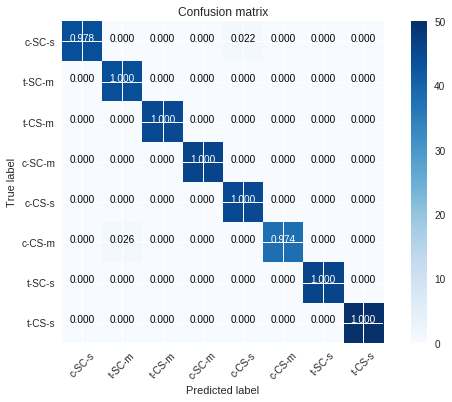

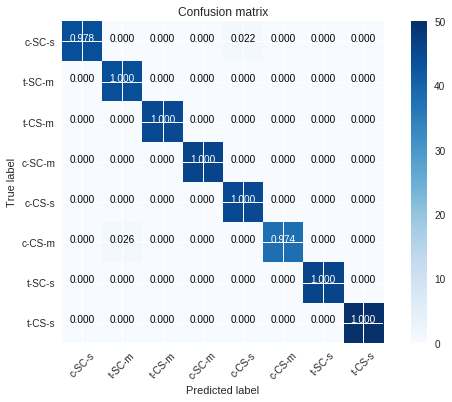

In [166]:
plot_confusion_matrix(y_test['class'], y_pred, class_names)
plt_manager.save_last_plt()

plt.show()


In [158]:
features = list(df_attributes.columns) + ['Genotype', 'Treatment', 'Behavior']
compound_importance = feature_importance_report(clf.clf['class'], features)

In [160]:
# remove the 'Genotype', 'Treatment' and 'Behaviour' as these are artefacts of the model

In [238]:
rows = []
for i in range(len(rf_importance)):
    rf_feature = rf_importance.iloc[i].Feature
    rf_importance_val = rf_importance.iloc[i].Relative_Importance
    dt_importance_row = dt_importance.loc[dt_importance.Feature==rf_feature]
    dt_rank = dt_importance_row.index[0]
    dt_importance_val = float(dt_importance_row.Relative_Importance)
    rows.append([rf_feature, i+1, rf_importance_val, dt_rank+1, dt_importance_val])

importance_table = pd.DataFrame(rows, columns = ['Feature', 'Random Forest Rank', 'Random Forest Importance', 'Decision Tree Rank', 'Decision Tree Importance'])

In [235]:
rows = []
for i in range(len(rf_importance)):
    row = []
    gen_feature = gen_importance.iloc[i].Feature
    gen_importance_val = gen_importance.iloc[i].Relative_Importance
    row.extend([gen_feature, i+1, gen_importance_val])
    for other_importance in [beh_importance, tre_importance, rf_importance]:
        dt_importance_row = other_importance.loc[dt_importance.Feature==gen_feature]
        dt_rank = dt_importance_row.index[0]
        dt_importance_val = float(dt_importance_row.Relative_Importance)
        row.extend([dt_rank+1, dt_importance_val])
    rows.append(row)
bin_importance_table = pd.DataFrame(rows, columns = ['Feature', 'Genotype Rank', 'Genotype Importance', 'Behavior Rank', 'Behavior Tree', 'Treatment Rank', 'Treatment Tree', 'Random Forest Rank', 'Random Forest Importance'])

In [239]:
importance_table

,Feature,Random Forest Rank,Random Forest Importance,Decision Tree Rank,Decision Tree Importance
0,SOD1_N,1,0.055669,1,0.130369
1,pERK_N,2,0.039076,56,0.000000
2,pPKCG_N,3,0.033574,2,0.113550
3,APP_N,4,0.031143,13,0.022713
4,ITSN1_N,5,0.030514,4,0.070010
5,DYRK1A_N,6,0.026201,23,0.013498
6,CaNA_N,7,0.025962,16,0.017280
7,pS6_N,8,0.025770,76,0.000000
8,pCAMKII_N,9,0.024585,3,0.080744
9,BRAF_N,10,0.024418,18,0.015438


In [228]:
rf_rank = importance_table[["Decision Tree Rank", "Decision Tree Importance"]]
rf_rank.sort_values(by=["Decision Tree Rank"])["Decision Tree Importance"][:7].sum()

0.51474059260992455

In [232]:
rf_rank = importance_table[["Decision Tree Rank", "Decision Tree Importance"]]
rf_rank.sort_values(by=["Decision Tree Rank"])["Decision Tree Importance"][:27].sum()

0.89596678254675943

In [220]:
rf_rank = importance_table[["Random Forest Rank", "Random Forest Importance"]]
rf_rank.sort_values(by=["Random Forest Rank"])["Random Forest Importance"][:20].sum()

0.50374821421548854

In [234]:
rf_rank = importance_table[["Random Forest Rank", "Random Forest Importance"]]
rf_rank.sort_values(by=["Random Forest Rank"])["Random Forest Importance"][:60].sum()

0.89583601183998374

In [164]:
importance_table

,Feature,Random Forest Rank,Random Forest Importance,Decision Tree Rank,Decision Tree Importance
0,SOD1_N,1,0.055669,1,0.130369
1,pERK_N,2,0.039076,56,0.000000
2,pPKCG_N,3,0.033574,2,0.113550
3,APP_N,4,0.031143,13,0.022713
4,ITSN1_N,5,0.030514,4,0.070010
5,DYRK1A_N,6,0.026201,23,0.013498
6,CaNA_N,7,0.025962,16,0.017280
7,pS6_N,8,0.025770,76,0.000000
8,pCAMKII_N,9,0.024585,3,0.080744
9,BRAF_N,10,0.024418,18,0.015438


In [240]:
bin_importance_table

,Feature,Genotype Rank,Genotype Importance,Behavior Rank,Behavior Tree,Treatment Rank,Treatment Tree,Random Forest Rank,Random Forest Importance
0,APP_N,1,0.113266,13,0.016467,13,0.020306,13,0.021311
1,Tau_N,2,0.056407,44,0.002268,44,0.009762,44,0.008629
2,ITSN1_N,3,0.043478,4,0.064740,4,0.026769,4,0.031143
3,AcetylH3K9_N,4,0.039605,41,0.002529,41,0.010644,41,0.008853
4,H3MeK4_N,5,0.028513,77,0.000429,77,0.005661,77,0.004780
5,H3AcK18_N,6,0.026362,5,0.061892,5,0.026074,5,0.030514
6,S6_N,7,0.025630,28,0.005063,28,0.012117,28,0.012113
7,DYRK1A_N,8,0.024302,23,0.005644,23,0.013871,23,0.014642
8,pMTOR_N,9,0.021581,40,0.002679,40,0.010669,40,0.008915
9,NR2B_N,10,0.018981,39,0.002686,39,0.010979,39,0.009139


In [207]:
compound_importance

,Feature,Relative_Importance
0,Treatment,0.109652
1,Genotype,0.102247
2,SOD1_N,0.047336
3,Behavior,0.043629
4,pPKCG_N,0.030350
5,pERK_N,0.026142
6,CaNA_N,0.023572
7,APP_N,0.021916
8,pS6_N,0.021188
9,ITSN1_N,0.021028


In [241]:
!pwd

/mnt/hgfs/patrick/Documents/uni
